</style>
<h1  style="text-align:center;font-size:60px"> Challenge Large Scale Machine Learning
    <h2 style="text-align:center">Face Recognition</h2>
    <h2 style="text-align:center">Report and algorithms</h2>
    <br><br>
    <h2 style="text-align:left;font-size:20px">
        <u> Date:</u> April 2020 <br><br>
        <u> Author of this document:</u><br><br>
          <li>Frank Facundo ( frank.facundo@telecom-paris.fr )</li>
          <li>Marko Avila ( marko.avila@telecom-paris.fr )</li><br>
        <u> Author of challenge :</u><br>
        <ul>
          <li>Pavlo Mozharovskyi ( pavlo.mozharovskyi@telecom-paris.fr )</li>
          <li>Umut Şimşekli ( umut.simsekli@telecom-paris.fr )</li>
          <li>Attilio Fiandrotti ( attilio.fiandrotti@telecom-paris.fr )</li>
          <li>Matthieu Labeau ( matthieu.labeau@telecom-paris.fr )</li>
        </ul> 
     </h2>
</h1>

# <b>Introduction</b>

## Fusion of algorithms for face recognition

The increasingly ubiquitous presence of biometric solutions and face recognition in particular in everyday life requires their adaptation for practical scenario. In the presence of several possible solutions, and if global decisions are to be made, each such single solution can be far less efficient than tailoring them to the complexity of an image.

In this challenge, the goal is to build a fusion of algorithms in order to construct the best suited solution for comparison of a pair of images. This fusion will be driven by qualities computed on each image.

Comparing of two images is done in two steps. 1st, a vector of features is computed for each image. 2nd, a simple function produces a vector of scores for a pair of images. The goal is to create a function that will compare a pair of images based on the information mentioned above, and decide whether two images belong to the same person.

You are provided a label set of training data and a test set without labels. You should submit a .csv file with labels for each entry of this test set.

# The properties of the dataset:


### Training data: 


The training set consist of two files, **xtrain_challenge.csv** and **xtest_challenge.csv**.

File **xtrain_challenge.csv** contains one observation per row which contains following entries based on a pair of images:
 * columns 1-13 - 13 qualities on first image;
 * columns 14-26 - 13 qualities on second image;
 * columns 27-37 - 11 matching scores between the two images.

File **ytrain_challenge.csv** contains one line with each entry corresponding to one observation in **xtrain_challenge.csv**, maintaining the order, and has '1' if a pair of images belong to the same person and '0' otherwise.

There are in total 1.068.504 training observations.

### Test data:

File **xtest_challenge.csv** has the same structure as file **xtrain_challenge.csv**.

There are in total 3.318.296 test observations.

## The performance criterion

The performance criterion is the **prediction accuracy** on the test set, which is a value between 0 and 1, the higher the better.

# Training Data

Training data, input (file **xtrain_challenge.csv**): https://partage.imt.fr/index.php/s/wwZnkb2RkmpNW6c

Training data, output (file **ytrain_challenge.csv**): https://partage.imt.fr/index.php/s/jjP3AcbDCSpqA73

# Test Data 

Test data, input (file **xtest_challenge.csv**): https://partage.imt.fr/index.php/s/4WBeSiwonnKigWL

# Libraries

First, let us import all libraries that we will use for this study.

In [ ]:
#Keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation, Flatten
#from tensorflow.keras import optimizers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD, Adamax

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#basic python packages for plotting and array management
import numpy as np
import matplotlib.pyplot as plt

#for data import
import pandas as pd

#xgboost
from xgboost import XGBClassifier

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

#Classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier

#Plot tree of xgboost
from xgboost import plot_tree

#Ensemble methods and crossvalidation
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier,RandomForestClassifier, VotingClassifier
#PostProcessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Oversampling -> balance dataset
from imblearn.over_sampling import SMOTE

#Because oh boy some computations take an amazing amount of time !
import time

#Get system methods
import sys
import os

#Save model 
import pickle

#Graph
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
#os.path.isfile('drive/Colab Notebooks/InputData/xtrain_challenge.csv')
os.listdir("drive/My Drive/Colab Notebooks/InputData")	
#os.getcwd()

['xtrain_challenge.csv',
 'ytrain_challenge.csv',
 'xtest_challenge.csv',
 'pima.pickle.dat']

In [ ]:
# Data Load
X_train = pd.read_csv('drive/My Drive/Colab Notebooks/InputData/xtrain_challenge.csv')
y_train = pd.read_csv('drive/My Drive/Colab Notebooks/InputData/ytrain_challenge.csv')
y_train = np.array(y_train).ravel()
X_test = pd.read_csv('drive/My Drive/Colab Notebooks/InputData/xtest_challenge.csv')

# Analysis of data

In [ ]:
# Columns utilities
cols_A= ["qs1","qs2","qs3","qs4","qs5","qs6","qs7",
           "qs8","qs9","qs10","qs11","qs12","qs13"]
cols_B= ["qr1","qr2","qr3","qr4","qr5","qr6","qr7",
           "qr8","qr9","qr10","qr11","qr12","qr13"]
cols_s= ["s1","s2","s3","s4","s5","s6","s7","s8", "s9","s10","s11"]

In [ ]:
X_train[cols_A].describe()

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13
count,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06
mean,9.939110e-01,4.062109e-03,1.981265e-03,-5.638050e-02,-5.566450e+00,-6.719246e-01,1.232389e+00,9.762378e-01,8.354712e-01,2.639817e+02,3.861633e+01,1.705724e-01,7.194563e-01
std,5.279321e-02,4.387503e-02,2.847684e-02,9.614619e+00,8.812512e+00,4.557793e+00,1.146359e+00,8.715162e-01,7.378927e-01,6.803376e+01,1.344225e+01,3.755492e-01,4.422864e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.685000e+01,-5.143000e+01,-2.640000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.725000e+02,1.842000e+01,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,-3.110000e+00,-1.252000e+01,-2.780000e+00,4.600000e-01,3.400000e-01,3.000000e-01,2.213600e+02,2.655000e+01,0.000000e+00,2.000000e-02
50%,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e-02,-4.630000e+00,-5.700000e-01,9.700000e-01,7.400000e-01,6.500000e-01,2.688200e+02,3.616000e+01,0.000000e+00,1.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,3.260000e+00,1.100000e+00,1.480000e+00,1.690000e+00,1.350000e+00,1.160000e+00,3.122700e+02,4.922000e+01,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,5.104000e+01,2.474000e+01,2.503000e+01,3.340000e+01,1.228000e+01,9.360000e+00,4.814200e+02,7.677000e+01,1.000000e+00,1.000000e+00


In [ ]:
X_train[cols_B].describe()

,qr1,qr2,qr3,qr4,qr5,qr6,qr7,qr8,qr9,qr10,qr11,qr12,qr13
count,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06
mean,9.966919e-01,2.310754e-03,9.640488e-04,-1.036062e-01,-5.861671e+00,-7.981382e-01,1.201231e+00,9.548716e-01,8.051214e-01,2.760477e+02,3.909588e+01,1.568631e-01,7.437085e-01
std,3.383501e-02,2.843183e-02,1.727963e-02,8.514148e+00,8.384315e+00,4.509544e+00,1.075848e+00,8.480760e-01,7.247391e-01,6.740609e+01,1.365819e+01,3.631910e-01,4.293497e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.476000e+01,-4.295000e+01,-2.531000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.418100e+02,1.846000e+01,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,-2.680000e+00,-1.255000e+01,-2.870000e+00,4.500000e-01,3.400000e-01,2.900000e-01,2.344300e+02,2.654000e+01,0.000000e+00,2.100000e-01
50%,1.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01,-5.020000e+00,-7.100000e-01,9.600000e-01,7.200000e-01,6.200000e-01,2.820700e+02,3.719000e+01,0.000000e+00,1.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,2.860000e+00,7.200000e-01,1.280000e+00,1.660000e+00,1.330000e+00,1.100000e+00,3.232800e+02,5.019000e+01,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,9.800000e-01,4.852000e+01,2.277000e+01,2.458000e+01,3.094000e+01,9.250000e+00,1.015000e+01,4.910900e+02,7.677000e+01,1.000000e+00,1.000000e+00


In [ ]:
X_train[cols_s].describe()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
count,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06,1.068504e+06
mean,2.307802e+03,2.202422e+03,2.497274e+03,2.473767e+03,2.169686e+03,2.352165e+03,2.212619e+03,2.306689e+03,2.587349e+03,3.206580e+03,2.585904e+03
std,8.115928e+02,7.977498e+02,1.017009e+03,9.813839e+02,1.386482e+03,9.488352e+02,1.079085e+03,1.110563e+03,1.023546e+03,6.179037e+02,8.981083e+02
min,9.753200e+02,8.820100e+02,9.321600e+02,1.122610e+03,2.909400e+02,9.150200e+02,4.346500e+02,5.777800e+02,1.258420e+03,2.304680e+03,1.283390e+03
25%,1.887960e+03,1.772090e+03,2.013940e+03,2.016820e+03,1.584630e+03,1.894908e+03,1.718750e+03,1.793940e+03,2.157860e+03,2.923360e+03,2.173520e+03
50%,2.136000e+03,2.029860e+03,2.267070e+03,2.242830e+03,1.878630e+03,2.132330e+03,1.976860e+03,2.064725e+03,2.359370e+03,3.066800e+03,2.384690e+03
75%,2.463520e+03,2.376270e+03,2.613220e+03,2.559810e+03,2.266820e+03,2.463582e+03,2.323122e+03,2.428290e+03,2.633230e+03,3.263193e+03,2.673370e+03
max,1.032901e+04,1.042724e+04,1.352429e+04,1.139322e+04,1.834417e+04,1.219225e+04,1.306042e+04,1.402735e+04,1.320572e+04,9.235040e+03,1.117024e+04


In [ ]:
print("Matching images number : {}". format(sum(y_train==1)))
print("Matching images percetange: {:.2f} %".format(100*
    sum(y_train==1)/y_train.shape[0]))

Matching images number : 39593
Matching images percetange: 3.71 %


We can see an unbalance dataset 

## Correlation analysis

In [ ]:
# Mask 
mask_match = (y_train == 1)

# Correlation matrix
corr_all = X_train.corr()
corr_m = X_train[mask_match].corr()
corr_um = X_train[~mask_match].corr()

In [ ]:
# Generate a mask for the down triangle of our correlation matrix
mask = np.zeros_like(corr_all, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

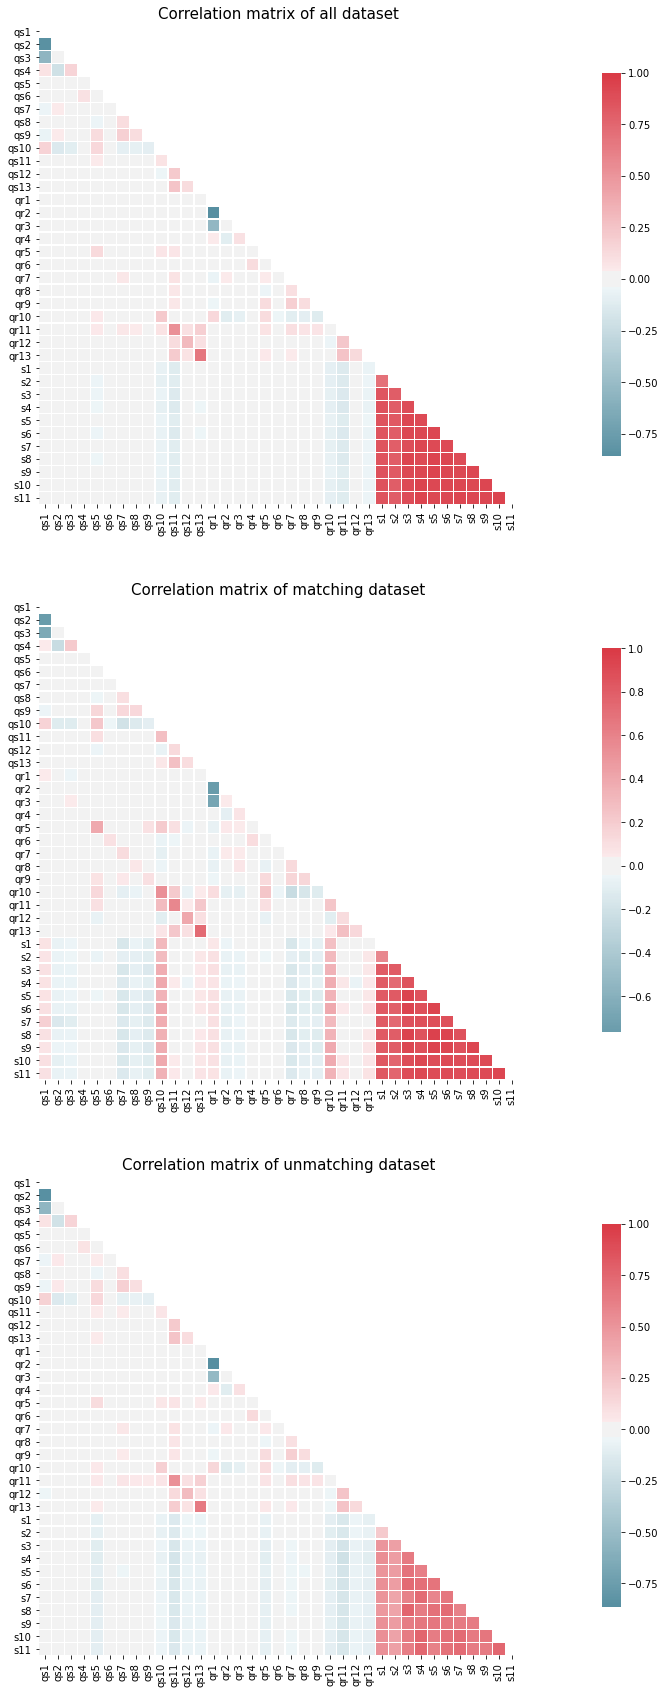

In [ ]:
#Let's plot the figure
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax =ax1 )
sns.heatmap(corr_m, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax =ax2 )
sns.heatmap(corr_um, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax =ax3 )

ax1.set_title("Correlation matrix of all dataset", fontsize= 15)
ax2.set_title("Correlation matrix of matching dataset", fontsize= 15)
ax3.set_title("Correlation matrix of unmatching dataset", fontsize= 15)
plt.show()

## Histogram Distribution Analysis

In [ ]:
# Concatenate the X values for the s columns with the Y 
data = pd.concat([X_train[cols_s], pd.DataFrame(y_train, columns = ["match"])], axis = 1 ,sort=False)

<Figure size 1080x1080 with 0 Axes>

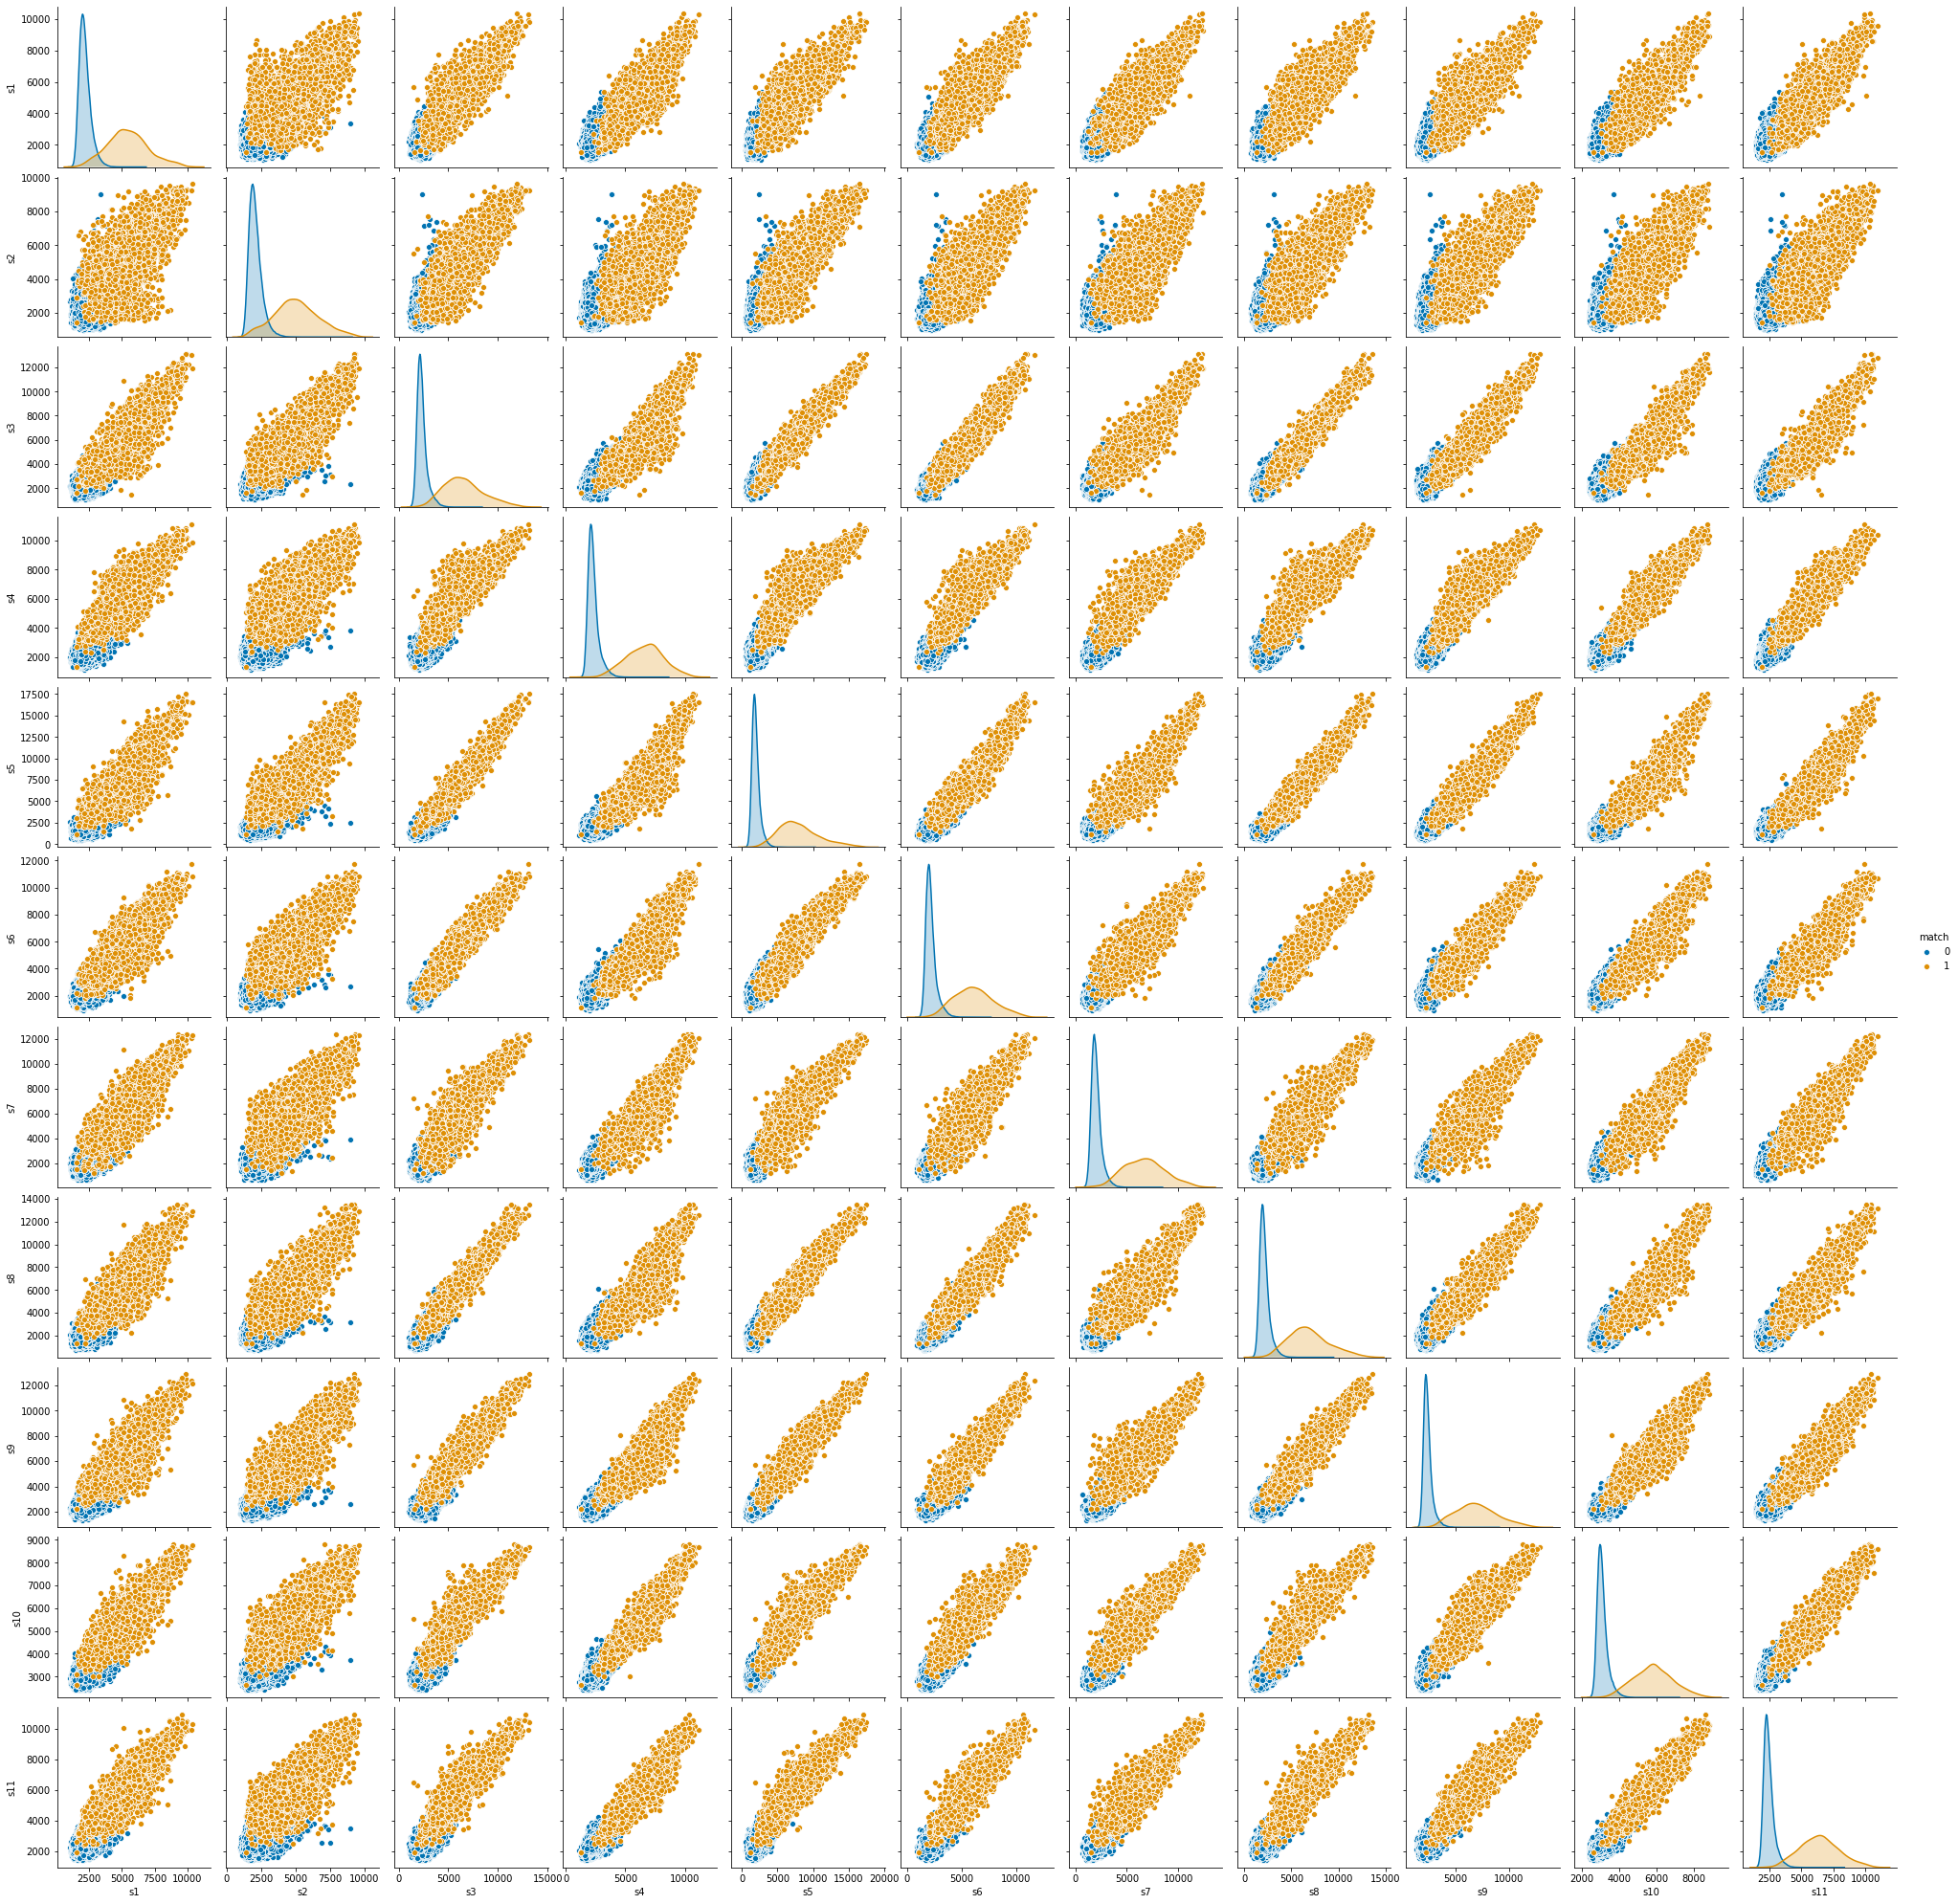

In [ ]:
''' Plot of the s values for the match and unmatch rows. 
    We lot only on the 100k rows, just to see the distribution. 
    There is no need at this point to check on the entire 3.5 k values
'''
fig = plt.figure(figsize =(15,15))
sns.pairplot(data[:100000], hue = "match", vars = cols_s, palette = "colorblind")
plt.show()

In [ ]:
# Define the new columns
cols_f =["f1","f2","f3","f4","f5","f6","f7",
         "f8","f9","f10","f11","f12","f13","f14"]
#Create the diff  values
X_feat_diff = pd.DataFrame(X_train_raw[cols_A].values - X_train_raw[cols_B].values,
                    columns=cols_f)
# Concatenate with the match values
data2 = pd.concat([X_feat_diff,
                 pd.DataFrame(y_train_raw, columns = ["match"])], axis = 1 ,sort=False)

In [ ]:
fig = plt.figure(figsize =(15,7))
sns.pairplot(data2[:1000], hue = "match", vars = cols_f)
plt.show()

# Fitting data

In [ ]:
myScaler = StandardScaler()
X_train_adapt_ = myScaler.fit_transform(X_train)
X_test_adapt_ = myScaler.fit_transform(X_test)
y_train_adapt_ = keras.utils.to_categorical(y_train, 2)

In [ ]:
#numberSamples = 500000
# All dataset
numberSamples = y_train.shape[0]

X_train_adapt = X_train_adapt_[:numberSamples]
X_test_adapt = X_test_adapt_
y_train_adapt = y_train_adapt_[:numberSamples]
numberSamples

1068504

In [ ]:
y_train_adapt.shape[0]

1068504

In [ ]:
X_test_adapt.shape[0]

3318296

#**APPLICATION OF CLASSIFICATION METHODS  LEARNING SUPERVISED**







## **ABSTRACT :**





Ensemble methods combine a set of classifiers to construct a new classifier that is (often) more accurate than any of its component classifiers. 
In this paper, we use ensemble methods to identify noisy training examples. More precisely, we consider the problem of mislabeled training examples in classification tasks, and address this problem by pre-processing the training set, i.e. by identifying and removing outliers from the training set. 

 We study a number of filter techniques that are based on well-known ensemble methods like cross-validated committees, bagging and boosting. 

We evaluate these techniques in an Inductive Logic Programming setting and use a first order decision tree algorithm to construct the ensembles.


 Moreever  it's necessary know ensemble learning helps improve machine learning results by combining several models. 
This approach allows the production of better predictive performance compared to a single model. 
That is why ensemble methods placed first in many prestigious machine learning competitions, such as the Netflix Competition, KDD 2009, and Kaggle.




## **What should we do now?**




Before we begin to apply the basic methods we have seen in class, we must reflect that the accuracy or performance of our automatic classification in machine learning concerning the data of the various images will improve with the combination of several of them.

For this reason, we must start to execute machine learning algorithms in supervised learning in order to see the pros and cons of combining some of them.

However it is necessary to know that after reading several websites and blogs about the application of these basic methods of machine learning, we conclude that the simple fact of combining methods according to our scores and their characteristics will generate a better and better model as well as the variation of hyperparameters of them.





## **METHODES BASIQUES** 

# Classifier *1*
## Decision Tree

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.



A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. 

Due to Decision trees can handle high dimensional data and  in general decision tree classifier has good accuracy, we are going to begin by test this model because the construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. 

So we are going to test the model of decision tree:

In [ ]:
model_0 = DecisionTreeClassifier()

In [ ]:
model_0.fit(X_train_adapt, y_train_adapt)

In [ ]:
# Classify the provided test data
ytest = rfc.predict(X_test)
print(ytest.shape)
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_DT.csv', ytest, fmt = '%1.0d', delimiter=',')

After running this first model we have been able to observe that the accuracy of the model is 0.9968; which is a good score to start this challenge; however it is necessary to improve it a little more.

Thanks to  ours resultats   we observed  Decision trees are able to generate understandable rules and perform classification without requiring much computation.

Althought Decision trees are able to handle both continuous and categorical variables.
Decision trees provide a clear indication of which fields are most important for prediction or classification.


### ***Analyze of model currently:***

 Then when using a decision tree model on a given training dataset the accuracy keeps improving with more and more splits. So we can easily overfit the data and doesn't know when you have crossed the line unless you are using cross validation (on training data set). 
 
However the advantage of a simple decision tree is model is easy to interpret, you know what variable and what value of that variable is used to split the data and predict outcome.

While a random forest is like a black box and works as mentioned in above answer. It's a forest you can build and control the number of trees you want and specify max num of features to be used in each tree But you cannot control the randomness, you cannot control which feature is part of which tree in the forest

So if we apply the Random Forest the   accuracy will increase because this  will reduce variance part of error rather than bias part, so on a given training data set decision tree may be more accurate than a random forest. But on an unexpected validation data set, Random forest always wins in terms of accuracy.

Then we are going this model in the following classifier

# Classifier *2*
## Ramdom Forest
<!--Comment about algorithm-->

In this case we are going to apply Random forest,which consists of a large number of individual decision trees that operate as an ensemble and  
each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction .
Each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

However the fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

For this reason  is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:


There needs to be some actual signal in our features so that models built using those features do better than random guessing.
The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other

***Due to a random forest is like a black box and works as mentioned in above answer. It's a forest you can build and control. You can specify the number of trees you want in your forest(n_estimators) and also you can specify max num of features to be used in each tree. But you cannot control the randomness, you cannot control which feature is part of which tree in the forest, you cannot control which data point is part of which tree.***

So the accuracy keeps increasing as you increase the number of trees, but becomes constant at certain point. 

***Unlike decision tree, it won't create highly biased model and reduces the variance.***

So we are going to test the model of Random Forest with parameters by default:

# Model 3.1
## Random Forest without parameters
<!--Comment about algorithm-->

### TEST 1

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
# Classify the provided test data
ytest = rfc.predict(xtest)
print(ytest.shape)
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_RF1.csv', ytest, fmt = '%1.0d', delimiter=',')

After running this first model we have been able to observe that the accuracy of the model is 0.9974; which is a good score better than the previous; however it is necessary to improve it a little more.

### ***Analyze of model currently:***

**Why exactly is a random forest better than a single decision tree?**


We can think about it terms of having hundreds of humans make estimates for the max temperature problem: by pooling predictions, we can incorporate much more knowledge than from any one individual. Each individual brings their own background experience and information sources to the problem.So Random forests consist of multiple single trees each based on a random sample of the training data and then they are typically more accurate than single decision trees.



After our test we have observed the accuracy of random forest is better than decision tree. This was possible because:

Random forests reduce the variance seen in decision trees by:

* Using different samples for training,
* Specifying random feature subsets, 
* Building and combining small (shallow) trees.

* A single decision tree is a weak predictor, but is relatively fast to build. More trees give you a more robust model and prevent overfitting. However, the more trees you have, the slower the process. Each tree in the forest has to be generated, processed, and analyzed




## **How to improve the accuracy of random forest?**

To improve the score of our model there are 8 ways to improve it: 
1. **Add more data**
2. **Treat missing and Outlier values**
3. **Feature Engineering**
4. **Feature Selection**
5. **Multiple algorithms**
6. **Algorithm Tuning**
7. **Ensemble methods.**
8. **Cross Validation**

However throughout this challenge we have relied on three methods to boost the accuracy of a model which are the tuning algorithm, the ensemble models and cross validation.

#### **Algorithm Tuning**

We know that machine learning algorithms are driven by parameters. These parameters majorly influence the outcome of learning process.

The objective of parameter tuning is to find the optimum value for each parameter to improve the accuracy of the model. To tune these parameters, you must have a good understanding of these meaning and their individual impact on model. You can repeat this process with a number of well performing models.

For example: In random forest, we have various parameters like max_features, number_trees, random_state, oob_score and others. Intuitive optimization of these parameter values will result in better and more accurate models.

***Then we will start to do the first test by changing the parameters of the number of estimators and the tree depth in the Random Forest Classifier application.***

# Model 3.2
## Random Forest with parameters
<!--Comment about algorithm-->

### TEST 2


In [ ]:
model = RandomForestRegressor(n_estimator = 100,max_depth=None,oob_score = TRUE,n_jobs = -1,random_state =1)

In [ ]:
model.fit(X,y)

In [ ]:
# Classify the provided test data
ytest =model.predict(xtest)
print(ytest.shape)
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_RFA.csv', ytest, fmt = '%1.0d', delimiter=',')

After this first test on the Random Forest with parameters, we have observed that the accuracy has improved a little. This increase was 0.00001 compared to the previous accuracy. This result was partly due to poor parameterization of the hyperparameters.


### TEST 3

In [ ]:
# random forest model creation
rfc = RandomForestClassifier( n_estimators=250,max_depth=8)
rfc.fit(X_train,y_train)

In [ ]:
# Classify the provided test data
ytest = rfc.predict(X_test)
print(ytest.shape)
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_RF2.csv', ytest, fmt = '%1.0d', delimiter=',')

After this first test we decided to increase the number of estimators and the depth of the trees in the random forest classifier we have observed that the accuracy has improved a little. This increase was 0.00021 compared to the previous accuracy.

So we noticed  that  if we increased the number of estimators  and the depth of trees in Random Forest, We improve  our accuracy in the model

# Model 3.3
## IMPROVING OF SCORE RANDOM FOREST WITH  HYPERPARAMETERS
<!--Comment about algorithm-->

After our first two random forest tests with different parameters we decided to look for an algorithm that would be able to find the performing parameters which give us the best accuracy in Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
print(RandomForestClassifier())
print(RandomForestRegressor())

In [ ]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[8]  
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X,y)

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

In [ ]:
rfc = RandomForestClassifier( n_estimators=800,max_depth=32)
rfc.fit(X_train,y_train)

In [ ]:
# Classify the provided test data
ytest = rfc.predict(X_test)
print(ytest.shape)
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_RF3.csv', ytest, fmt = '%1.0d', delimiter=',')

After the application of the search algorithm we have been able to find the parameters that make our model perform better at Random Forest. The parameters were :

* number of estimators=800
* depth = 32

With these new parameters our model improved by 0.0035, which the final acuracy with this model was 0.9979


# Classifier 3
## Extra Tree
<!--Comment about algorithm-->

Extra Trees is like a Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. 

So in  ExtraTrees:

Builds multiple trees with bootstrap = False by default, which means it samples without replacement nodes are split based on random splits among a random subset of the features selected at every node.

In Extra Trees, randomness doesn’t come from bootstrapping the data, but rather comes from the random splits of all observations. 

In Extra Tres the variance is lower than in Random Forest so our accuracy will be much better.

In [ ]:
      
extc = ExtraTreesClassifier(n_estimators=580,max_features= 168,criterion= 'entropy',min_samples_split= 3,
                            max_depth= 30, min_samples_leaf= 8)      
extc.fit(X,y)          

In [ ]:
# Classify the provided test data
ytest = extc.predict(X_test)
print(ytest.shape)
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_extc.csv', ytest, fmt = '%1.0d', delimiter=',')

After running this model we obtained an accuracy that is good enough but not more performing than random forest. So the accuracy found in this model was 0.9968, which was lower than the accuracy of our random forest with hyperparameters.

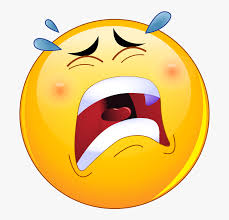

####**Due to this discrepancy in accuracy we decided to test the strongest and most basic model in machine learning and deep learning which is Neural Networks.**

##**Back to Neural Networks**

# Classifier 5
## Neural Networks
<!--Comment about algorithm-->

Neural nets are a means of doing machine learning, in which a computer learns to perform some task by analyzing training examples. Usually, the examples have been hand-labeled in advance. An object recognition system, for instance, might be fed thousands of labeled images of cars, houses, coffee cups, and so on, and it would find visual patterns in the images that consistently correlate with particular labels.

In fact Neural networks are multi-layer networks of neurons (the blue and magenta nodes in the chart below) that we use to classify things, make predictions, etc. 

For instance below is the diagram of a simple neural network with five inputs, 5 outputs, and two hidden layers of neurons.


![texto alternativo](https://miro.medium.com/max/1592/1*yGMk1GSKKbyKr_cMarlWnA.jpeg)

To each of its incoming connections, a node will assign a number known as a “weight.” When the network is active, the node receives a different data item — a different number — over each of its connections and multiplies it by the associated weight. 
It then adds the resulting products together, yielding a single number. If that number is below a threshold value, the node passes no data to the next layer. 
 
 If the number exceeds the threshold value, 
the node “fires,” which in today’s neural nets generally means sending the number — the sum of the weighted inputs — along all its outgoing connections.



Moreover the computer with the neural network is taught to do a task by having it analyze training examples, which have been previously labeled in advance. A common example of a task for a neural network using deep learning is an object recognition task, where the neural network is presented with a large number of objects which it's the case in this challenge.

## **What are we going to do now?**

* **Before starting or conceiving our supervised learning models in neural networks we decided to make a test in order to run Neural Networks without any optimization modification of this powerful model in machine learning**.

* **After our first test we have obtained an accuracy of 0.9969 which is good but much less than the accuracy of the random forest**.

* **For this reason we have decided to improve neural networks using certain optimizers that we will see in the development of our methods and also use regulators that allow us to increase the performance of our prediction**. 



### **Why we need Optimization in neural networks?**

The answer to this question is that  Optimization algorithms or strategies are responsible for reducing the losses and to provide the most accurate results possible
Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.



So in machine learning, we perform optimization on the training data and check its performance on a new validation data.

We already have a cost function which will tell us about the behavior of our model. Initially, our model contains arbitrary defined parameters like weights and biases and now we need to find the best possible state of those parameters to make a good prediction of unseen data and to do that we need some sort of a mechanism to update the parameters.

***Now, we do this by a base technique called Gradient Descent. In this technique weights are updated by the following method :***


![texto alternativo](https://hackernoon.com/hn-images/1*Dhr8kQr0XXKSfm0Ry_YNMw.png)

![texto alternativo](https://hackernoon.com/hn-images/1*ykRTMpIdFqmyvTY6aEVoVw.png)

Now we are going to test neural networks with the optimizers seen previously.



## Model 5.1
## Neural Networks - ADAM optimizer
<!--Comment about algorithm-->

### **Adaptive Moment Estimation** -(ADAM)

Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

***Adam is different to classical stochastic gradient descent.In the case of Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.***

While Adam computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients.

Adam is another algorithm that computes adaptive learning rates(η) of each parameter. The main difference is that instead of just storing an exponentially decaying average of past gradients (mₜ) like momentum it also stores exponentially decaying average of past squared gradients (vₜ) like RMSProp and AdaDelta.

![texto alternativo](https://hackernoon.com/hn-images/1*c0SkaOVC79PMU0gSb4tR8w.png)

As mₜ and vₜ are initialized as 0 vectors, they are biased towards 0, and especially when the decay rates are small (i.e. β₁ and β₂ are close to 1). Therefore, to overcome this issue mₜ cap and vₜ cap is calculated

![texto alternativo](https://hackernoon.com/hn-images/1*Ru7oblq9oQ6GaDVUpKQWbg.png)

Now, we just have to write an expression for updating our parameters as we did in other optimizers.
![texto alternativo](https://hackernoon.com/hn-images/1*koOi4N4CfdrbU8Tl6xjH1Q.png)

## Model 5.2
## Neural Networks - ADAMAX optimizer
<!--Comment about algorithm-->

### **Adaptive Moment Estimation Maximun** -(ADAMAX)

Adamax is a variant of Adam based on the infinity norm. In Adam update rule scales the gradient inversely proportionally to the 𝔩₂ norm of the past gradients (vₜ-₁) and the current gradient term(|gₜ|²) instead of this we can generalize the update to the 𝔩ₚ norm.

![texto alternativo](https://hackernoon.com/hn-images/1*SmC6F5PQqk1Ri-mYYPSEXA.png)

putting p →∞ ,


![texto alternativo](https://hackernoon.com/hn-images/1*u_xvFdtgjGPZxCbCfQP6kA.png)

Finally, we can now put this uₜ in the Adam update equation by replacing with √^vₜ + ϵ :


![texto alternativo](https://hackernoon.com/hn-images/1*oE5SRwUKv2Q90zg6Bf2DZw.png)

Note that as uₜ relies on the max operation, it is not as suggestible to bias towards zero as mₜ and vₜ in Adam, which is why we do not need to compute a bias correction for uₜ. Good default values are again η=0.002, β₁=0.9 and β₂=0.999 .

In [ ]:
epochs = 100

input_shape = 37
output_shape = 2
batch_size=32

model = Sequential()
model.add(Dense(input_shape, activation="relu", input_shape = (input_shape,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(output_shape, activation='sigmoid'))

model.summary()

optimizer = optimizers.Adamax(learning_rate=0.002, beta_1=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

history = model.fit(X_train_adapt,y_train_adapt,
            validation_split=0.3,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 37)                1406      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4864      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1

NameError: ignored

In [ ]:
model.save('Model_NN.h5')

In [ ]:
ytest = model.predict(X_test_adapt_)

In [ ]:
y_test = [np.argmax(x, axis=None) for x in ytest]

In [ ]:
print(len(y_test))
np.savetxt('ytest_challenge_student_facundo.csv', y_test, fmt = '%1.0d', delimiter=',')

## Model 5.3
## Neural Networks - Stochastic Gradient Descent (SGD) optimizer
<!--Comment about algorithm-->

SGD updates model parameters (theta) in the negative direction of the gradient (g) by taking a subset or a mini-batch of data of size (m):

![texto alternativo](https://miro.medium.com/max/858/1*-boTeUpYw6v7DFdd4LveVw.png)

![texto alternativo](https://miro.medium.com/max/203/1*msuW9Fk_BxXP7kJo6wSEDQ.png)



The neural network is represented by f(x(i); theta) where x(i) are the training data and y(i) are the training labels, the gradient of the loss L is computed with respect to model parameters theta. The learning rate (eps_k) determines the size of the step that the algorithm takes along the gradient (in the negative direction in the case of minimization and in the positive direction in the case of maximization).


In addition the learning rate is a function of iteration k and is a single most important hyper-parameter. A learning rate that is too high (e.g. > 0.1) can lead to parameter updates that miss the optimum value, a learning rate that is too low (e.g. < 1e-5) will result in unnecessarily long training time.

Now we are going to test this optimazer which it's the optimizer the more basic in neural networks.*texto en cursiva*

## Model 5.4
## Neural Networks - Dropout
<!--Comment about algorithm-->

According to Wikipedia —
The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.
More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed

#### **However why  we have prefered to test this method?**

*The answer to these questions is “to prevent over-fitting”.*


In machine learning, regularization is way to prevent over-fitting. Regularization reduces over-fitting by adding a penalty to the loss function. By adding this penalty, the model is trained such that it does not learn interdependent set of features weights. Those of you who know Logistic Regression might be familiar with L1 (Laplacian) and L2 (Gaussian) penalties.
Dropout is an approach to regularization in neural networks which helps reducing interdependent learning amongst the neurons . 


### **Dropout equivalent to regularized Network**
This means minimizing the Dropout loss  is equivalent to minimizing a regularized network, shown  below.

![texto alternativo](https://miro.medium.com/max/1400/1*Fe59QpsnXQSGW_XH4Kxm9A.png)

So we are going to test this method in order to visualize if our new model become more optimal. Because the regulazation can improve the accuracy



In [ ]:
epochs = 30

input_shape = 37
output_shape = 2
batch_size=32

model = Sequential()
model.add(Dense(input_shape, activation="relu", input_shape = (input_shape,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(output_shape, activation='sigmoid'))

model.summary()

optimizer = optimizers.Adamax(learning_rate=0.002, beta_1=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

history = model.fit(X_train_adapt,y_train_adapt,
            validation_split=0.05,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1)



In [ ]:
model.save('Model_NN3.h5')
ytest = model.predict(X_test_adapt_)
y_test = [np.argmax(x, axis=None) for x in ytest]
print(len(y_test))
np.savetxt('ytest_challenge_student_facundo3.csv', y_test, fmt = '%1.0d', delimiter=',')

## Model 5.5
## MLP

We will discuss one of the easiest to implement Neural Network for classification from Scikit-Learn’s called the MLPClassifier.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

![texto alternativo](https://miro.medium.com/max/12840/1*v88ySSMr7JLaIBjwr4chTw.jpeg)

If a multilayer perceptron has a linear activation function in all neurons, that is, a linear function that maps the weighted inputs to the output of each neuron, then linear algebra shows that any number of layers can be reduced to a two-layer input-output model. In MLPs some neurons use a nonlinear activation function that was developed to model the frequency of action potentials, or firing, of biological neurons.

The two historically common activation functions are both sigmoids, and are described by

![texto alternativo](https://miro.medium.com/max/1452/1*XxxiA0jJvPrHEJHD4z893g.png)

In recent developments of deep learning the rectifier linear unit (ReLU) is more frequently used as one of the possible ways to overcome the numerical problems related to the sigmoids.

Then for our test we have used  the two activations  sigmoid (tanh) and relu  and morever two optimizers: 'sgd', 'adam'

In [ ]:
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(128,128,128), (64, 256,256,64), (128,256,256,128,64,16,8)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001 , 0.1 ,0.05],
    'learning_rate': ['constant','adaptive'],
    'tol': 0.0001,
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_adapt, y_train_adapt)

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
y_pred = clf.predict(X_test_adapt)

In [ ]:
#Test 1
hidden_layer_sizes = [(128,128,128), (64, 256,256,64), (128,256,256,128,64,16,8), (50,50,50), (50,100,50), (100,)]
activation = ['tanh', 'relu']
solver = ['adam', 'sgd']
alpha = [0.0001, 0.001 , 0.1 ,0.05]
learning_rate = ['constant','adaptive']
tol = 0.0001

In [ ]:
print(str(hidden_layer_sizes[0]))

(128, 128, 128)


In [ ]:
print(type(str(hidden_layer_sizes[0])))

<class 'str'>


In [ ]:
i = 0
for solver_i in solver:
  for learning_rate_i in learning_rate:
    for alpha_i in alpha:
      for activation_i in activation:
        for hidden_layer_sizes_i in hidden_layer_sizes:
          i= i+1
          print(i)
          model = MLPClassifier(activation=activation_i, alpha=alpha_i, hidden_layer_sizes= hidden_layer_sizes_i, learning_rate= learning_rate_i, max_iter= 50,solver=solver_i,verbose=True, tol = 0.0007 )
          model.fit(X_train_adapt, y_train_adapt)
          pickle.dump(model, open("drive/My Drive/Colab Notebooks/results/MLP_hidden_layer_sizes:"+ str(hidden_layer_sizes_i)+ "_activation:" + str(activation_i) + "_alpha:"+ str(alpha_i)+"_lr:"+ str(learning_rate_i)+ "_solver:"+ solver_i + ".dat", "wb"))
          ytest = model.predict(X_test_adapt)
          y_test = [np.argmax(x, axis=None) for x in ytest]
          np.savetxt('drive/My Drive/Colab Notebooks/results/y_test_MLP_hidden_layer_sizes:'+ str(hidden_layer_sizes_i)+ "_activation:" + str(activation_i) + "_alpha:"+ str(alpha_i)+"_lr:"+ str(learning_rate_i)+ "_solver:"+ solver_i + '.csv', y_test, fmt = '%1.0d', delimiter=',')

1
Iteration 1, loss = 0.01495112
Iteration 2, loss = 0.01038348
Iteration 3, loss = 0.00941871
Iteration 4, loss = 0.00884574
Iteration 5, loss = 0.00825098
Iteration 6, loss = 0.00784191
Iteration 7, loss = 0.00729415
Iteration 8, loss = 0.00691572
Iteration 9, loss = 0.00669140
Iteration 10, loss = 0.00633588
Iteration 11, loss = 0.00590476
Iteration 12, loss = 0.00563628
Iteration 13, loss = 0.00538370
Iteration 14, loss = 0.00514550
Training loss did not improve more than tol=0.000700 for 10 consecutive epochs. Stopping.


### **OVERALL CONCLUSION OF NEURAL NETWORKS MODELS BUILT**

**After making the test of all the models of neural networks with the different optimizers used.**

**We have been able to observe that the accuracy of our prediction is better using the Adamax optimizers which gives us an accuracy of 0.9983 and Adam which gives us an accuracy of 0.9981.**

**However we have observed that all the models used have better accuracy than the neural networks used at the beginning.**

*For example in the case of the neural networks test with gradient socastics it has an accuracy of 0.9968 which is good but as we have seen there are two models with the above mentioned opmitizers that have better performance.*

**Then in the case of the Neural Network model with dropout we have been able to realize that the accuracy also improved in 0.0011 which gives us an accuracy of 0.9979, which is not so much because this method alone has not allowed us to have overfitting.**


**In the case of the use of the multi layer perceptron model we have been able to realize that after the neural network models with the adam and adamax optimizers, the MLP model gives us an accuracy of 0.998 which is very good and of course that so far exceeds the random forest.**

**However, for the moment our accuracy is 0.9983 so  there will be some way to obtain a much higher accuracy than that obtained with neural networks -ADAMAX?.**

**The answer to this question is in the use of joining methods with good accuracy with the purpose of obtaining a more performing model. **



#**ENSEMBLE METHODS**


This is the most common approach found majorly in winning solutions of Data science competitions. This technique simply combines the result of multiple weak models and produce better results. This can be achieved through many ways:

* **Bagging (Bootstrap Aggregating)**
* **Boosting**

Ensemble methods can be divided into two groups:
1. **Sequential ensemble methods**where the base learners are generated sequentially  e.g. AdaBoost).

  The basic motivation of sequential methods is to exploit the dependence between the base learners. The overall performance can be boosted by weighing previously mislabeled examples with higher weight.

2. **Parallel ensemble methods** where the base learners are generated in parallel (e.g. Random Forest).

  The basic motivation of parallel methods is to exploit independence between the base learners since the error can be reduced dramatically by averaging.

**However it's possible that ensemble methods help us to improve the accuracy of our prediction?**

 That's rigth beacause they can learn and model the relationships between inputs and outputs that are nonlinear and complex; make generalizations and inferences; reveal hidden relationships, patterns and predictions; 
and model highly volatile data (such as financial time series data) and variances needed to predict rare events (such as fraud detection).




it is always a better idea to apply ensemble methods to improve the accuracy of your model,improvise on the stability and predictive power of the model.. There are two good reasons for this:
*  a ) They are generally more complex than traditional methods.
*  b) The traditional methods give you a good base level from which you can improve and draw from to create your ensembles

We are going to begin by the technique of bagging.

## **A. BAGGING**

# Classifier 6 - Bagging

 Bagging tries to implement similar learners on small sample populations and then takes a mean of all the predictions. In generalized bagging, you can use different learners on different population.  As you can expect this helps us to reduce the variance error.

 ![texto alternativo](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/bagging.png)

In general, the purpose of bagging is to reduce the variance of the estimator, in other words to correct the instability of decision trees (the fact that small changes in the learning set result in very different trees). To do this, the principle of the bootstrap is to create "new samples" by randomly drawing from the old sample, with a discount. The algorithm, e.g. the decision tree, is trained on these subsets of data. The estimators thus obtained are averaged (when the data are quantitative, in the case of a regression tree) or used for a majority "vote" (for qualitative data, in the case of a classification tree).

### ***To begin we are gooing to use bagging in our MLP model.***

## Model 6.1 - Bagging of MLPs

In the results obtained previously we saw that the accuracy of the MLP model is very good despite not exceeding the neural network with adamax et adam optimizers. For this reason we are now trying to improve the accuracy of MLP with a bagging since it is an easy model to implement and fast to run. However, we are testing to see if bagging could further improve the neural network with adamax et adam optimizers.

In [ ]:
#Customizing the number of features and observations
X_train_adapt, y_train_adapt, X_test_adapt = prepare_dataset(X_train, y_train, X_test, var_ratio_min=99.9, ratio_sd=100)

clf_bag = MLPClassifier(batch_size='auto', activation='relu', solver='adam', alpha=0.1, tol=0.0007)
clf = BaggingClassifier(base_estimator=clf_bag, 
                        n_estimators=40, 
                        max_samples=0.35,
                        max_features= 0.62,
                        n_jobs=4, 
                        verbose=5)
#Fitting
start = time.time()
clf.fit(X_train_adapt, y_train_adapt)
print("total time used for fitting: %s"%(makeTimeSignificant(time.time() - start)))

#Score
score = compute_pred_score(y_train_adapt, y_pred_train)
print("Score with bagging + MPLClassifier estimator %0.3f"%(score))
print("\n\nConfusion matrix")
print(confusion_matrix(y_train_adapt, y_pred_train))

After the test we can see that the accuracy of this new model is much better than the MLP since it gives us an accuracy of 0.99802 which is close to our two models of neural network with adamax et adam optimizers.

Although we have been able to improve our MLP we have realized that if we apply bagging to our neural network models with adamax et adam optimizers they will not increase much and if they do they will be at 0.00001 which does not have much gain in the speed of execution of the algorithm performed.


# Classifier 7 - Voting - Part 1

The use of bagging is adapted to algorithms with high variance which are thus stabilized (neural networks, decision trees for classification or regression...), but it can also degrade qualities for more stable algae (k closest neighbours with k large, linear regression).
For example, dozens of classifiers will be generated in total that will need to be "bagged". The main advantage of these procedures is that the generation of these models can be naturally parallelized.

We thus obtain a set of models for which it is advisable to average (in the case of a regression) or vote (for a classification) the different predictions.

In this case we are going to made a voting with differents predictions obtained or which we will obtain .

## Model 6.1
## Voting of Bagging of Neural Networks 
<!--Comment about algorithm-->

In [ ]:
y_train_adapt_ = y_train
y_train_adapt = y_train_adapt_[:numberSamples]

#clf_bag = MLPClassifier(batch_size=400, activation='relu', solver='adam', alpha=0.316228)
clf_bag = MLPClassifier(batch_size=400, activation='relu', solver='adam')
clf1 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.2, oob_score=True)
clf2 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.4, oob_score=True)
clf3 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.6, oob_score=True)
clf4 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.8, oob_score=True)
clf5 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=1.0, oob_score=True)
clf = VotingClassifier(estimators=[('clf1', clf1),('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5)], n_jobs=4, voting='soft')

#Fitting
start = time.time()
clf1.fit(X_train_adapt, y_train_adapt)
clf2.fit(X_train_adapt, y_train_adapt)
clf3.fit(X_train_adapt, y_train_adapt)
clf4.fit(X_train_adapt, y_train_adapt)
clf5.fit(X_train_adapt, y_train_adapt)
clf.fit(X_train_adapt, y_train_adapt)
print("total time used for fitting: %s"%(makeTimeSignificant(time.time() - start)))

"""
#Predicting
y_pred_train = predict_labels(XX=X_train_adapt, clf=clf, threshold=0.82)

#Score
score = compute_pred_score(y_train_adapt, y_pred_train)
print("Score with bagging + MPLClassifier estimator %0.3f"%(score))
print("\n\nConfusion matrix")
print(confusion_matrix(y_train_adapt, y_pred_train))

#Saving results
print("\nNow for the test set")
save_prediction(X_test=X_test_adapt, clf=clf, trial_number=18, threshold=0.82)
"""

In [ ]:
start = time.time()
y_pred = clf.predict(X_train_adapt[:])
print("Total timed used for predicting: %s"%(makeTimeSignificant(time.time() - start)))

In [ ]:
#Score
#score = compute_pred_score(y_train_adapt, y_pred_train)
score = accuracy_score(y_train_adapt, y_pred)
print("Score with bagging + MPLClassifier estimator %0.3f"%(score))
print("\n\nConfusion matrix")
print(confusion_matrix(y_train_adapt, y_pred))

In [ ]:
import pickle
# save the classifier
with open('Neurons+Bagging+Voting4.pkl', 'wb') as file:
    pickle.dump(clf, file)    

# load it again
with open('Neurons+Bagging+Voting4.pkl', 'rb') as file:
    clf_loaded = pickle.load(file)

In [ ]:
#model.save('Model_NN3.h5')
y_test = clf.predict(X_test_adapt_)
#ytest = model.predict(X_test_adapt_)
#y_test = [np.argmax(x, axis=None) for x in ytest]
print(len(y_test))
np.savetxt('ytest_challenge_student_facundo4.csv', y_test, fmt = '%1.0d', delimiter=',')

In [ ]:
# Test 2

In [ ]:
y_train_adapt_ = y_train
y_train_adapt = y_train_adapt_[:numberSamples]

clf_bag = MLPClassifier(batch_size=400, activation='relu', solver='adam', alpha=0.05, hidden_layer_sizes = (128,256,256,128,64,16,8), learning_rate = 'constant', verbose=True, tol = 0.0001)
#clf_bag = MLPClassifier(batch_size=400, activation='relu', solver='adam')
clf1 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.2, oob_score=True)
clf2 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.4, oob_score=True)
clf3 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.6, oob_score=True)
clf4 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=0.8, oob_score=True)
clf5 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=4, verbose=5, max_samples=1.0, oob_score=True)
clf = VotingClassifier(estimators=[('clf1', clf1),('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5)], n_jobs=4, voting='soft')

#Fitting
start = time.time()
clf1.fit(X_train_adapt, y_train_adapt)
clf2.fit(X_train_adapt, y_train_adapt)
clf3.fit(X_train_adapt, y_train_adapt)
clf4.fit(X_train_adapt, y_train_adapt)
clf5.fit(X_train_adapt, y_train_adapt)
clf.fit(X_train_adapt, y_train_adapt)
print("total time used for fitting: %s"%(makeTimeSignificant(time.time() - start)))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
import pickle
# save the classifier
with open("drive/My Drive/Colab Notebooks/results/Voting batch_size=400, activation='relu', solver='adam', alpha=0.05, hidden_layer_sizes = (128,256,256,128,64,16,8), learning_rate = 'constant', verbose=True, tol = 0.0001", 'wb') as file:
    pickle.dump(clf, file)    

# load it again
with open("drive/My Drive/Colab Notebooks/results/Voting batch_size=400, activation='relu', solver='adam', alpha=0.05, hidden_layer_sizes = (128,256,256,128,64,16,8), learning_rate = 'constant', verbose=True, tol = 0.0001", 'wb') as file:
    clf_loaded = pickle.load(file)


In [ ]:
y_test = clf.predict(X_test_adapt_)
#ytest = model.predict(X_test_adapt_)
#y_test = [np.argmax(x, axis=None) for x in ytest]
print(len(y_test))
np.savetxt("drive/My Drive/Colab Notebooks/results/ytest_Voting batch_size=400, activation='relu', solver='adam', alpha=0.05, hidden_layer_sizes = (128,256,256,128,64,16,8), learning_rate = 'constant', verbose=True, tol = 0.0001", y_test, fmt = '%1.0d', delimiter=',')

After the execution of our two tests in which we have added bagging to our previous MLP model.

According to our models conceived in this opportunity they were more perfomant than our precedent models.

For these tests we have used 5 bagging followed by our MLP model.

And finally after the construction of this model we have obtained an accuracy of 0.9984. Wowww this result surprised us because we saw how much our MLP model improved.



## Model 6.2
## Voting of Bagging of Neural Networks and XGB

In [ ]:
with open('drive/My Drive/Colab Notebooks/results/Neurons+Bagging+Voting4.pkl', 'rb') as file:
    clf_loaded = pickle.load(file)

In [ ]:
from os import listdir
from os.path import isfile, join
models_dir = 'drive/My Drive/Colab Notebooks/results/XGB-model-Final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
XGBModels = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
      XGBModels.append(pickle.load(file))
      #clf_loaded = pickle.load(file)

In [ ]:
#XGBModel[0].predict
y_test = XGBModels[18].predict(X_test_adapt[:10])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import xgboost as xgb
xgb.__version__

'0.90'

In [ ]:
import pickle
y_train_adapt_ = y_train
y_train_adapt = y_train_adapt_[:numberSamples]

clf_bag = MLPClassifier(batch_size=400, activation='relu', solver='adam')
clf1 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=10, verbose=5, max_samples=0.2, oob_score=True)
clf2 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=10, verbose=5, max_samples=0.4, oob_score=True)
clf3 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=10, verbose=5, max_samples=0.6, oob_score=True)
clf4 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=10, verbose=5, max_samples=0.8, oob_score=True)
clf5 = BaggingClassifier(base_estimator=clf_bag, n_estimators=50, n_jobs=10, verbose=5, max_samples=1.0, oob_score=True)
  

In [ ]:
#Fitting
start = time.time()
clf1.fit(X_train_adapt, y_train_adapt)
with open("drive/My Drive/Colab Notebooks/results/BaggingMLPWithoutParams0,2", 'wb') as file:
    pickle.dump(clf1, file) 

In [ ]:
clf2.fit(X_train_adapt, y_train_adapt)
with open("drive/My Drive/Colab Notebooks/results/BaggingMLPWithoutParams0,4", 'wb') as file:
    pickle.dump(clf2, file)  

In [ ]:
clf3.fit(X_train_adapt, y_train_adapt)
with open("drive/My Drive/Colab Notebooks/results/BaggingMLPWithoutParams0,6", 'wb') as file:
    pickle.dump(clf3, file) 

In [ ]:
clf4.fit(X_train_adapt, y_train_adapt)
with open("drive/My Drive/Colab Notebooks/results/BaggingMLPWithoutParams0,8", 'wb') as file:
    pickle.dump(clf4, file) 

In [ ]:
clf5.fit(X_train_adapt, y_train_adapt)
with open("drive/My Drive/Colab Notebooks/results/BaggingMLPWithoutParams1,0", 'wb') as file:
    pickle.dump(clf5, file) 

In [ ]:
MLP_XGB = [('clf1', clf1),('clf2', clf2),('clf3', clf3),('clf4', clf4),('clf5', clf5), ('XGB0',XGBModels[0]), ('XGB1',XGBModels[1]), 
           ('XGB2',XGBModels[2]), ('XGB3',XGBModels[3]), ('XGB4',XGBModels[4]), ('XGB5',XGBModels[5]), ('XGB6',XGBModels[6]), ('XGB7',XGBModels[7]), 
           ('XGB8',XGBModels[8]), ('XGB9',XGBModels[9]), ('XGB10',XGBModels[10]), ('XGB11',XGBModels[11]), ('XGB12',XGBModels[12]), ('XGB13',XGBModels[13]), 
           ('XGB14',XGBModels[14]), ('XGB15',XGBModels[15]), ('XGB16',XGBModels[16]), ('XGB17',XGBModels[17]), ('XGB18',XGBModels[18])]
clf = VotingClassifier(estimators=MLP_XGB, voting='soft')
clf.fit(X_train_adapt, y_train_adapt)

In [ ]:
# Test 3

In [ ]:
XGB = [('XGB0',XGBModels[0]), ('XGB1',XGBModels[1]), ('XGB2',XGBModels[2]), ('XGB3',XGBModels[3]), 
           ('XGB4',XGBModels[4]), ('XGB5',XGBModels[5]), ('XGB6',XGBModels[6]), ('XGB7',XGBModels[7]), 
           ('XGB8',XGBModels[8]), ('XGB9',XGBModels[9]), ('XGB10',XGBModels[10]), ('XGB11',XGBModels[11]), 
           ('XGB12',XGBModels[12]), ('XGB13',XGBModels[13]), ('XGB14',XGBModels[14]), ('XGB15',XGBModels[15]), 
           ('XGB16',XGBModels[16]), ('XGB17',XGBModels[17]), ('XGB18',XGBModels[18])]
y_test = XGBModels[4].predict(X_test_adapt[:10])

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
clf = VotingClassifier(estimators=XGB, voting='soft')
clf.fit(X_train_adapt, y_train_adapt)

In [ ]:

with open("drive/My Drive/Colab Notebooks/results/Voting_XGB", 'wb') as file:
    pickle.dump(clf, file) 

# **B. BOOSTING**

Boosting methods work in the same spirit as bagging methods: we build a family of models that are aggregated to obtain a strong learner that performs better. However, unlike bagging that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is fitted giving more importance to observations in the dataset that were badly handled by the previous models in the sequence. Intuitively, each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). Boosting, like bagging, can be used for regression as well as for classification problems.

Being mainly focused at reducing bias, the base models that are often considered for boosting are models with low variance but high bias. For example, if we want to use trees as our base models, we will choose most of the time shallow decision trees with only a few depths. Another important reason that motivates the use of low variance but high bias models as weak learners for boosting is that these models are in general less computationally expensive to fit (few degrees of freedom when parametrised)

![texto alternativo](https://miro.medium.com/max/2000/1*VGSoqefx3Rz5Pws6qpLwOQ@2x.png)

*Boosting consists in, iteratively, fitting a weak learner, aggregate it to the ensemble model and “update” the training dataset to better take into account the strengths and weakness of the current ensemble model when fitting the next base model.*

![texto alternativo](https://miro.medium.com/max/1590/0*_wMK-i9e2hqO79BS.png)

In this challenge we have decided test the following boosting:
* **Gradient Boosting Classifier**
* **AdaBoost**
* **LigthBoost**
* **XGBoost**
* **CatBoost Classifier**

# Classifier 8
## AdaBoost
<!--Comment about algorithm-->

The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore Tree 1 + Tree 2. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models.

AdaBoost works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns.

This means that samples that are difficult to classify receive increasing larger weights until the algorithm identifies a model that correctly classifies these sample

![texto alternativo](https://miro.medium.com/max/1390/0*oxAkJZ1WEe_-ugoe.png)

*We have seen how Adaboost works in a granular level, by breaking down every notation in the formula. We have then applied simple math to understand how each component of the formula works. This practice of approaching formulas through its decomposed parts can be a useful practice for understanding machine learning algorithms.*

Now we are going to implement the  boosting Algorithme AdaBoost 

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create adaboost classifer object
abc =AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)

# Train Adaboost Classifer
model = abc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_AD = model.predict(xtest)

np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_ADS.csv', y_pred_AD, fmt = '%1.0d', delimiter=',')

After running this model we obtained an accuracy that is good enough but not more performing than MLP +Bagging. So the accuracy found in this model was 0.99799, which was lower than the accuracy of our MLP alone with hyperparameters.

Then if we want improve the accuracy of this method, we should use the version of Gradient Boosting classifier because this  involves three elements of optimizing:

* A loss function to be optimized.
* A weak learner to make predictions.
* An additive model to add weak learners to minimize the loss function.


So we are going to the method Gradient Boosting Classifier.

# Classifier 9
## Gradient Boosting Classifier
<!--Comment about algorithm-->


Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). 

While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function . The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data.

A logical understanding of loss function would depend on what we are trying to optimise. For example, if we are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices. 
 
Similarly, if our goal is to classify credit defaults, then the loss function would be a measure of how good our predictive model is at classifying bad loans. 


So we are going to implement this method in 2 types: Boosting with default parameters and Boosting with default parameters

## Model 9.1

## Boosting with default parameters
<!--Comment about algorithm-->



In [ ]:
y_train_adapt = y_train

In [ ]:
model = XGBClassifier(verbose_eval=True)

In [ ]:
model.fit(X_train_adapt, y_train_adapt, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose_eval=True, verbosity=1)

XGBoostError: ignored

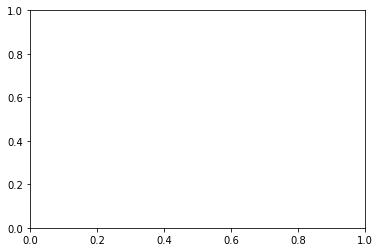

In [ ]:
plot_tree(model)

In [ ]:
pickle.dump(model, open("pima.pickle.dat", "wb"))
pickle.dump(model, open("drive/My Drive/Colab Notebooks/InputData/pima.pickle.dat", "wb"))

In [ ]:
# make predictions for test data
y_test = model.predict(X_test_adapt)
predictions = [round(value) for value in y_test]

In [ ]:
print(y_test[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(len(y_test))
np.savetxt('ytest_challenge_student_facundo10.csv', y_test, fmt = '%1.0d', delimiter=',')

3318296


After running this  model we have been able to observe that the accuracy of the model is 0.99816; which is a good score better than the previous; however it is necessary to improve it a little more if we find the best hyerparameters.

## Model 9.2
## Boosting with multiple parameters

In [ ]:
y_train_adapt = y_train

In [ ]:
print(len(y_train_adapt))

1068504


In [ ]:
#Test 1
max_depth = [3, 4, 8, 16, 32]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7]
colsample_bytree = [0.3, 0.5, 0.7]
reg_alpha = [0, 0.00001, 0.01, 0.1, 1, 100]

In [ ]:
#Test 2
max_depth = [8, 16, 32]
learning_rate = [0.3, 0.4, 0.5]
colsample_bytree = [0.5, 0.7]
reg_alpha = [0]
# scale_pos_weight = 26 because 3.71% is a match of same photo
# To know further : https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
scale_pos_weight = 26

In [ ]:
#Test 3
max_depth = [32, 64]
learning_rate = [0.3, 0.4, 0.5]
colsample_bytree = [0.5, 0.7]
reg_alpha = [0, 0.1, 10]
# scale_pos_weight = 26 because 3.71% is a match of same photo
# To know further : https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
scale_pos_weight = [20, 26, 50]

In [ ]:
#Test 4
max_depth = [32, 64]
learning_rate = [0.3, 0.4, 0.5]
colsample_bytree = [0.7]
reg_alpha = [0, 0.1]
# scale_pos_weight = 26 because 3.71% is a match of same photo
# To know further : https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
scale_pos_weight = [1]

In [ ]:
sm = SMOTE(random_state=12,ratio=1.0)
X_train_adapt, y_train_adapt = sm.fit_sample(X_train_adapt, y_train_adapt)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(len(y_train_adapt))

2057822


In [ ]:
i = 0
for max_depth_i in max_depth:
  for learning_rate_i in learning_rate:
    for colsample_bytree_i in colsample_bytree:
      for reg_alpha_i in reg_alpha:
        for scale_pos_weight_i in scale_pos_weight:
          i= i+1
          print(i)
          model = XGBClassifier(max_depth= max_depth_i, learning_rate = learning_rate_i, colsample_bytree = colsample_bytree_i, reg_alpha = reg_alpha_i, scale_pos_weight_i=scale_pos_weight,  verbosity=1)
          model.fit(X_train_adapt, y_train_adapt, verbose=True)
          pickle.dump(model, open("drive/My Drive/Colab Notebooks/results/XGB_MDepth:"+ str(max_depth_i)+ "_lr:" + str(learning_rate_i) + "_coltree:"+ str(colsample_bytree_i)+"_alpha:"+ str(reg_alpha_i)+"_scale_pos_weight:"+ str(scale_pos_weight_i)+ ".dat", "wb"))
          y_test = model.predict(X_test_adapt)
          np.savetxt('drive/My Drive/Colab Notebooks/results/y_test_XGB_MDepth:'+ str(max_depth_i)+ "_lr:" + str(learning_rate_i) + "_coltree:"+ str(colsample_bytree_i)+"_alpha:"+ str(reg_alpha_i)+"_scale_pos_weight:"+ str(scale_pos_weight_i)+'.csv', y_test, fmt = '%1.0d', delimiter=',')

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
#!zip -r /content/file.zip /content/Folder_To_Zip
#from google.colab import files
#files.download("/content/file.zip")

After the application of the search algorithm we have been able to find the parameters that make our model perform better at Boosting with parameters. The parameters were :

* depth = 32
* learning rate = 0.3
* colum by tree=0.7
* alpha=0.1
* scale_pos_weight=20

With these new parameters our model improved , which the final acuracy with this model was 0.99838. However until now the best accuracy is 0.99846

## **XGBOOST**

XGBoost, or Extreme Gradient Boosting, is one of the most widely used supervised machine learning algorithms today.
This algorithm is characterized by obtaining good prediction results with relatively little effort, in many cases comparable to or better than those returned by more computationally complex models, particularly for problems with heterogeneous data.

* XGBoost Extreme Gradient Boosting is a supervised predictive algorithm that uses the boosting principle.
The idea behind boosting is to generate multiple "weak" predictive models sequentially, and have each of these models take the results of the previous model, to generate a "stronger" model, with better predictive power and greater stability in its results.

*  To achieve a stronger model, an optimization algorithm is used, this case Gradient Descent.
During the training, the parameters of each weak model are adjusted iteratively trying to find the minimum of an objective function, which can be the ratio of error in the classification, the area under the curve (AUC), the root of the mean square error (RMSE) or some other.

* Each model is compared with the previous one. If a new model has better results, then it is taken as the basis for further modifications. If, on the other hand, it has worse results, then the best previous model is returned and that one is modified in a different way.

This process is repeated until a point is reached where the difference between consecutive models is negligible, indicating that we have found the best possible model, or when the maximum number of iterations defined by the user is reached.

![texto alternativo](https://miro.medium.com/max/777/1*l4PN8hyAO4fMLxUbIxcETA.png)

# Classifier 10 - Voting Part 2

In this part we fused many models that we have trained already in order to have more diversity

## Model 13.1 - Voting MLPComplex

In [ ]:
from os import listdir
from os.path import isfile, join
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/MLP-complex-final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
MLP_complex_Models = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        MLP_complex_Models.append(pickle.load(file))
        #clf_loaded = pickle.load(file)

In [ ]:
MLP_Complex = [('MLP_Complex0', MLP_complex_Models[0]),('MLP_Complex1', MLP_complex_Models[1]),
               ('MLP_Complex2', MLP_complex_Models[2]),('MLP_Complex3', MLP_complex_Models[3]),
               ('MLP_Complex4', MLP_complex_Models[4])]
clf = VotingClassifier(estimators=MLP_Complex, voting='soft')
clf.fit(X_train_adapt, y_train_adapt)

In [ ]:
filepath = '/home/infres/ffacundo/Challenge/SD210-other/Voting-Models-final/Voting_MLP_Complex'
with open(filepath, 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
y_test = clf_voting.predict(X_test_adapt)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/SD210-other/Voting-Models-final/ytest_Voting_MLP_Complex", y_test, fmt = '%1.0d', delimiter=',')

## Model 13.2 - Voting MLPSimple and XGB

In [ ]:
from os import listdir
from os.path import isfile, join
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/MLP-simple-final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
MLP_simple_Models = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        MLP_simple_Models.append(pickle.load(file))
        #clf_loaded = pickle.load(file)

In [ ]:
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/XGB-model-Final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
XGBModels = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        XGBModels.append(pickle.load(file))

In [ ]:
MLP_Simple = [('MLP_Simple0', MLP_simple_Models[0]),('MLP_Simple1', MLP_simple_Models[1]),
               ('MLP_Simple2', MLP_simple_Models[2]),('MLP_Simple3', MLP_simple_Models[3]),
               ('MLP_Simple4', MLP_simple_Models[4])]
XGB = [('XGB0',XGBModels[0]), ('XGB1',XGBModels[1]), ('XGB2',XGBModels[2]), ('XGB3',XGBModels[3]), 
           ('XGB4',XGBModels[4]), ('XGB5',XGBModels[5]), ('XGB6',XGBModels[6]), ('XGB7',XGBModels[7]), 
           ('XGB8',XGBModels[8]), ('XGB9',XGBModels[9]), ('XGB10',XGBModels[10]), ('XGB11',XGBModels[11]), 
           ('XGB12',XGBModels[12]), ('XGB13',XGBModels[13]), ('XGB14',XGBModels[14]), ('XGB15',XGBModels[15]), 
           ('XGB16',XGBModels[16]), ('XGB17',XGBModels[17]), ('XGB18',XGBModels[18])]
models = np.concatenate((MLP_Simple, XGB), axis=0)

In [ ]:
clf = VotingClassifier(estimators=models, voting='soft')
clf.fit(X_train_adapt, y_train_adapt)

In [ ]:
filepath = '/home/infres/ffacundo/Challenge/SD210-other/Voting-Models-final/Voting_MLPSimple_XGB'
with open(filepath, 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
y_test = clf.predict(X_test_adapt)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/SD210-other/Voting-Models-final/ytest_Voting_MLPSimple_XGB", y_test, fmt = '%1.0d', delimiter=',')

## Model 13.3 - Voting MLPComplex and XGB

In [ ]:
from os import listdir
from os.path import isfile, join
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/MLP-complex-final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
MLP_complex_Models = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        MLP_complex_Models.append(pickle.load(file))
        #clf_loaded = pickle.load(file)

In [ ]:
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/XGB-model-Final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
XGBModels = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        XGBModels.append(pickle.load(file))

In [ ]:
MLP_Complex = [('MLP_Complex0', MLP_complex_Models[0]),('MLP_Complex1', MLP_complex_Models[1]),
               ('MLP_Complex2', MLP_complex_Models[2]),('MLP_Complex3', MLP_complex_Models[3]),
               ('MLP_Complex4', MLP_complex_Models[4])]
XGB = [('XGB0',XGBModels[0]), ('XGB1',XGBModels[1]), ('XGB2',XGBModels[2]), ('XGB3',XGBModels[3]), 
           ('XGB4',XGBModels[4]), ('XGB5',XGBModels[5]), ('XGB6',XGBModels[6]), ('XGB7',XGBModels[7]), 
           ('XGB8',XGBModels[8]), ('XGB9',XGBModels[9]), ('XGB10',XGBModels[10]), ('XGB11',XGBModels[11]), 
           ('XGB12',XGBModels[12]), ('XGB13',XGBModels[13]), ('XGB14',XGBModels[14]), ('XGB15',XGBModels[15]), 
           ('XGB16',XGBModels[16]), ('XGB17',XGBModels[17]), ('XGB18',XGBModels[18])]
models = np.concatenate((MLP_Complex, XGB), axis=0)

In [ ]:
clf = VotingClassifier(estimators=models, voting='soft')
clf.fit(X_train_adapt, y_train_adapt)

In [ ]:
filepath = '/home/infres/ffacundo/Challenge/SD210-other/Voting-Models-final/Voting_MLPComplex_XGB'
with open(filepath, 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
y_test = clf.predict(X_test_adapt)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/SD210-other/Voting-Models-final/ytest_Voting_MLPComplex_XGB", y_test, fmt = '%1.0d', delimiter=',')

## Model 13.4 - Voting MLPComplex MLPSimple and XGB

In [ ]:
from os import listdir
from os.path import isfile, join
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/MLP-complex-final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
MLP_complex_Models = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        MLP_complex_Models.append(pickle.load(file))
        #clf_loaded = pickle.load(file)

In [ ]:
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/XGB-model-Final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
XGBModels = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        XGBModels.append(pickle.load(file))

In [ ]:
models_dir = '/home/infres/ffacundo/Challenge/SD210-other/MLP-simple-final'
onlyfiles = [f for f in listdir(models_dir) if isfile(join(models_dir, f))]
#print(onlyfiles)
i = 0
MLP_simple_Models = []
for file_i in onlyfiles:
    i=i+1
    filepath = models_dir + "/" + file_i
    #print(i)
    #print(filepath)
    with open(filepath, 'rb') as file:
        MLP_simple_Models.append(pickle.load(file))
        #clf_loaded = pickle.load(file)

In [ ]:
MLP_Complex = [('MLP_Complex0', MLP_complex_Models[0]),('MLP_Complex1', MLP_complex_Models[1]),
               ('MLP_Complex2', MLP_complex_Models[2]),('MLP_Complex3', MLP_complex_Models[3]),
               ('MLP_Complex4', MLP_complex_Models[4])]
MLP_Simple = [('MLP_Simple0', MLP_simple_Models[0]),('MLP_Simple1', MLP_simple_Models[1]),
               ('MLP_Simple2', MLP_simple_Models[2]),('MLP_Simple3', MLP_simple_Models[3]),
               ('MLP_Simple4', MLP_simple_Models[4])]
XGB = [('XGB0',XGBModels[0]), ('XGB1',XGBModels[1]), ('XGB2',XGBModels[2]), ('XGB3',XGBModels[3]), 
           ('XGB4',XGBModels[4]), ('XGB5',XGBModels[5]), ('XGB6',XGBModels[6]), ('XGB7',XGBModels[7]), 
           ('XGB8',XGBModels[8]), ('XGB9',XGBModels[9]), ('XGB10',XGBModels[10]), ('XGB11',XGBModels[11]), 
           ('XGB12',XGBModels[12]), ('XGB13',XGBModels[13]), ('XGB14',XGBModels[14]), ('XGB15',XGBModels[15]), 
           ('XGB16',XGBModels[16]), ('XGB17',XGBModels[17]), ('XGB18',XGBModels[18])]
models = np.concatenate((MLP_Complex, MLP_Simple, XGB), axis=0)

In [ ]:
len(models)

In [ ]:
clf = VotingClassifier(estimators=models, voting='soft')
clf.fit(X_train_adapt, y_train_adapt)

In [ ]:
y_test = clf.predict(X_test_adapt)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/SD210-other/Voting-Models-final/ytest_Voting_MLPComplex_MLPSimple_XGB", y_test, fmt = '%1.0d', delimiter=',')


# Classifier 11- LightGBM

LightGBM uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value while XGBoost uses pre-sorted algorithm & Histogram-based algorithm for computing the best split

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.
Below diagrams explain the implementation of LightGBM and other boosting algorithms.

![texto alternativo](https://miro.medium.com/max/1400/1*AZsSoXb8lc5N6mnhqX5JCg.png)

### **Why have we decided to implement this method after XGBoost?**

 Because Light GBM has high speed and this can handle the large size of data and takes lower memory to run. Another reason of why Light GBM. The answer is because it focuses on accuracy of results. 

## Model 11.1

In [ ]:
bst2 =  lgb.LGBMClassifier(max_depth=8, objective = 'binary',learning_rate=0.1,n_estimators=1500,boosting_type='goss', n_jobs = 100)
bst2.fit(X_train_adapt, y_train_adapt)

In [ ]:
y_test = bst2.predict(X_test_adapt)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/SD210-other/ytest_lightgbm2", y_test, fmt = '%1.0d', delimiter=',')

## Model 11.2

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [ ]:
#Prediction
y_pred=clf.predict(x_test)
s=y_pred.shape[0]#convert into binary values


In [ ]:
for i in range(s):
    if y_pred[i]>=y_pred.mean():       # setting threshold to 0.36
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,predictions)

In [ ]:
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_lgb.csv',y_pred, fmt = '%1.0d', delimiter=',')

## Model 11.3

In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
   
    'boosting_type': 'rf',
    'objective': 'regression',
    'metric': {'l2', 'rmse'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose_eval':5
}

print('Start training...')
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=5) # Arret si 5 iterations sans gain de performance


print('Start predicting...')
preds = gbm.predict(xtest, num_iteration=gbm.best_iteration)

In [ ]:
for i in range(s):
    if preds[i]>=0.035:       # setting threshold to .5
       preds[i]=1
    else:  
       preds[i]=0

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(preds,predictions)

In [ ]:
np.savetxt('drive/My Drive/Projet_Machine_learning/results/ytest_challenge_student_lgb2.csv',preds, fmt = '%1.0d', delimiter=',')

After running this 3 model we obtained an accuracy that is good enough but not more performing than our complex models with voting. So the accuracy found in 1th model was 0.99799,in 2th model 0.99812 and 3 th model we have had an accuracy of 0.99818 which is less well than our model MLP+bagging. 

AFTER OUR RESEARCH ON THE INTERNET WE HAVE BEEN ABLE TO CONCLUDE THAT THIS MODEL WILL IMPROVE ITS FITNESS BY FINDING THE PARAMETERS THAT WILL ALLOW THE MODEL TO ITS MAXIMUM ACCURACY. This seems a few complex :(

## Model 11.4

In [ ]:
bst2 =  lgbm.LGBMClassifier(objective = 'binary',learning_rate=0.07,num_leaves=71,max_depth=8,n_estimators=1600,boosting_type='goss', min_child_samples= 100, subsample= 0.8, colsample_bytree= 0.9, n_jobs = 50)

In [ ]:
bst2.fit(X_train, y_train)

In [ ]:
y_test = bst2.predict(X_test)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/final_results/ytest_lightgbm_goku2", y_test, fmt = '%1.0d', delimiter=',')

After running this 4 model we obtained our best accuracy for the moment, this is 0.998593253887 !!!

# Classifier 12 - CatBoostClassifier

The name CatBoost comes from the union of the terms "Category" and "Boosting". "Category" refers to the fact that the library works perfectly with multiple data categories, such as audio, text and image, including historical data. On the other hand, "Boosting" refers to the fact that the algorithm is based on the "Gradient boosting" technique. Gradient boosting is a technique that is applied to multiple types of problems such as fraud detection, recommendation engines and predictions. In addition to obtaining good results with relatively less data, Deep Learning models.




**But why have we chosen this model to improve our past accuracy?**

Because it produces excellent results with relatively smaller data sets than other automatic learning methods.

* It works automatically with categorical features. 

* It is possible to use both numerical and categorical data with CatBoost without any pre-processing. 

* CatBoost converts categorical values into numbers using various statistics about combinations of categorical characteristics and combinations of categorical and numerical characteristics.

* It requires few hyperparameters to be set, avoiding the possibility of over-adjustment. This way, more generalized models are obtained.

## 12.1 6000-Iterations

In [ ]:
cat = CatBoostClassifier(iterations= 6000,learning_rate=0.1,silent=False, thread_count = 50)

In [ ]:
cat.fit(X_train_adapt, y_train_adapt, verbose=True)

In [ ]:
y_test = cat.predict(X_test_adapt)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/SD210-other/ytest_catboost3", y_test, fmt = '%1.0d', delimiter=',')

In this case we have seen that increasing the number of iterations, decrease our score, this can be explain by overfitting.

## 12.2 3000-Iterations

In [ ]:
clf_cb2 = CatBoostClassifier(iterations=3000,depth=8, learning_rate=0.09,
                           devices='0:1', thread_count = 100)
clf_cb2.fit(train, ytraining, eval_set=[(valid, yvalidation.to_numpy().ravel())])

In [ ]:
ypredicted_catboost= clf_cb2.predict(xtest)
np.savetxt('Facundo_cb.csv', ypredicted_catboost, fmt = '%1.0d', delimiter=',')

Decreasing the number of iteration and changing a little bit the learning rate (0.09) we have obtained one of our best results. In order to achive this parameter, we trained more than 500 hyperparameters.

Finetuning hyperparameters from Catboost gave our second best score this is 0.998592651168

# **Other way to increase our accuracy: Add more data**
Having more data is always a good idea. It allows the “data to tell for itself,” instead of relying on assumptions and weak correlations. Presence of more data results in better and accurate models.

In order to increase our score we tried to duplicate our dataset through a simple trick, permute columns "qr" and "qs" and then add it to our dataset.
This allow us to duplicate our dataset but after training it with our best models, it does not increase our final score.

In [ ]:
cols1 = ['qs1', 'qs2', 'qs3', 'qs4', 'qs5', 'qs6', 'qs7', 'qs8', 'qs9', 'qs10',
       'qs11', 'qs12', 'qs13']
cols2 = ['qr1', 'qr2', 'qr3', 'qr4', 'qr5', 'qr6', 'qr7',
       'qr8', 'qr9', 'qr10', 'qr11', 'qr12', 'qr13']
rest = ['s1', 's2', 's3', 's4',
       's5', 's6', 's7', 's8', 's9', 's10', 's11']

In [ ]:
rest_data = X_train[rest]
cols2_data = X_train[cols2]
cols1_data = X_train[cols1]

In [ ]:
X_train2 = pd.concat([cols2_data, cols1_data, rest_data], axis=1, join='inner')

In [ ]:
X_train2.rename(columns={"qr1":"qs1", 'qr2':'qs2', 'qr3':'qs3', 'qr4':'qs4', 'qr5':'qs5', 'qr6':'qs6', 'qr7':'qs7',
'qr8':'qs8', 'qr9':'qs9', 'qr10':'qs10', 'qr11':'qs11', 'qr12':'qs12', 'qr13':'qs13',
'qs1':'qr1', 'qs2':'qr2', 'qs3':'qr3', 'qs4':'qr4', 'qs5':'qr5', 'qs6':'qr6', 'qs7':'qr7', 
'qs8':'qr8', 'qs9':'qr9', 'qs10':'qr10', 'qs11':'qr11', 'qs12':'qr12', 'qs13':'qr13'})

In [ ]:
X_train_final = X_train.append(X_train2)

In [ ]:
y_train_final =np.concatenate([y_train,y_train])

In [ ]:
bst2 =  lgbm.LGBMClassifier(objective = 'binary',learning_rate=0.07,num_leaves=71,max_depth=8,n_estimators=1600,boosting_type='goss', min_child_samples= 100, subsample= 0.8, colsample_bytree= 0.9, n_jobs = 50)
bst2.fit(X_train_final, y_train_final)
y_test = bst2.predict(X_test)
print(len(y_test))
np.savetxt("/home/infres/ffacundo/Challenge/SD210-other/ytest_lightgbm_kakaroto", y_test, fmt = '%1.0d', delimiter=',')

# **Final result :**

#**Finally the best accuracy  obtained  was 0.998593253887. For obtain this resultat we have used our best results of LightBoost**

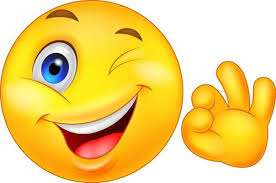

# **TOOL FOR LOAD OUR MODELS AUTOMATICALLY**

To load all our models generated in csv format we have used the following code in order that all the models that we obtain are loaded to the challenge server automatically.

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 00:13:07 2020

@author: Frank Facundo
"""

import mechanize
from bs4 import BeautifulSoup
import re
from os import listdir
from os.path import isfile, join

#filename1 = "/home/frank/Downloads/y_test_XGB_MDepth_3_lr_0.0001_coltree_0.5_alpha_100.csv"
ytest_dir = "/media/frank/Docs/Escritorio/Télécom/2A/SD-Sciences_des_données/SD-TSIA-210-MachineLearning/Challenge/results/ytest"


def submit_score(filename):
    print("##########")
    print(filename)
    
    f = open("result_with_score.txt", "a")
    f.write("##########\n")
    f.write(filename)
    f.write("\n")
    
    br = mechanize.Browser()
    br.open("http://datachallenge2.enst.fr/accounts/login/")

    br.select_form(nr=0)
    br.form['username'] = 'FACUNDO_RAIME_Frank_Enrique'
    br.form['password'] = 'recuse moose holdup shalom'
    req = br.submit()
    #br.response().read() 

    br.select_form(nr=0)
    br.form.add_file(open(filename), 'text/plain', filename)
    req = br.submit()

    soup = BeautifulSoup(req.read(), 'html.parser')

    div = soup.find_all("div", class_="col-md-4")

    score = re.findall(r"<p>.*", str(div[2]))
    print( score[0]  )
    print("\n")
    f.write(score[0])
    f.write("\n")
    f.close()

#submit_score(filename1)
    
    
def submit_dir():
    onlyfiles = [f for f in listdir(ytest_dir) if isfile(join(ytest_dir, f))]
    #print(onlyfiles)
    i = 0
    for file_i in onlyfiles:
        i=i+1
        filepath = ytest_dir + "/" + file_i
        print(i)
        submit_score(filepath)
        
submit_dir()
#submit_score("/media/frank/Docs/Escritorio/Télécom/2A/SD-Sciences_des_données/SD-TSIA-210-MachineLearning/Challenge/results/ytest/y_test_XGB_MDepth_3_lr_0.7_coltree_0.3_alpha_1e-05.csv")

# **REFERENCES BIBLIOGRAPHIQUES:**


* Hansen, L., & Salamon, P. (1990). Neural network ensembles. IEEE Trans. Pattern Analysis and Machine Intell., 12, 993–1001.
* Hornik, K., Stinchcombe, M., & White, H. (1990). Universal approximation of an unknown mapping and its derivatives using multilayer feedforward networks. Neural Networks, 3, 551–560.
* Kwok, S.W., & Carter, C. (1990). Multiple decision trees. In Schachter, R. D., Levitt, T.S., Kannal, L.N., & Lemmer, J.F. (Eds.), Uncertainty in Artificial Intelligence4, pp. 327–335. Elsevier Science, Amsterdam.
* Schapire, R.E., & Singer, Y. (1998). Improved boosting algorithms using confidence-rated predictions. In Proc. 11th Annu. Conf. on Comput. Learning Theory, pp. 80–91. ACM Press, New York, NY.

* Tumer, K., & Ghosh, J. (1996). Error correlation and error reduction in ensemble classifiers. Connection Science, 8(3–4), 385–404.
* https://morioh.com/p/32c506939ad5
* https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/
*  The Elements of Statistical Learning, Robert Tibishirani-Jerome Friedman
https://web.stanford.edu/~hastie/Papers/ESLII.pdf
* Understanding Machine Learning: From Theory to Algorithms Shai Shalev-Schwartz
https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf
*  Python Data Science Handbook: Essential Tools for Working with Data
https://github.com/jakevdp/PythonDataScienceHandbook

*  Bauer, E., & Kohavi, R. (1999). An empirical comparison of voting classification algorithms: Bagging, boosting, and variants. Machine Learning, 36(1/2), 105–139.
